In [39]:
import numpy as np
import matplotlib.pyplot as plt
from epsr import EPSR
import matplotlib.patheffects as path_effects


# equidistant Omega l1norm_objective

## FOR d=1,3,5

In [40]:
def L1normFinalVar(x, Omegas, d):
    b=EPSR(x, Omegas, d)
    return np.sum(np.abs(b))

r = 2

# odd order d
d = 1
# d = 3
# d = 5

Omegas = np.arange(1, r+1)

L1norm_objective = lambda x:  L1normFinalVar(x, Omegas, d)

In [41]:
# Build grid data
N = 400  # Resolution

# Generate grid data
merge = 1.05
x = np.linspace(-merge * np.pi, merge * np.pi, N)
y = np.linspace(-merge * np.pi, merge * np.pi, N)
X, Y = np.meshgrid(x, y)

# Vectorized calculation of function values
vec_func = np.vectorize(lambda a, b: L1norm_objective(np.array([a, b])))
Z_data = vec_func(X, Y)


c:\Users\laizh\Desktop\code\lai_PSR_RCBCD\epsr.py:30: LinAlgWarning: Ill-conditioned matrix (rcond=1.04399e-16): result may not be accurate.
  return scipy.linalg.solve(A, b, assume_a="gen")
c:\Users\laizh\Desktop\code\lai_PSR_RCBCD\epsr.py:30: LinAlgWarning: Ill-conditioned matrix (rcond=1.03182e-16): result may not be accurate.
  return scipy.linalg.solve(A, b, assume_a="gen")
c:\Users\laizh\Desktop\code\lai_PSR_RCBCD\epsr.py:30: LinAlgWarning: Ill-conditioned matrix (rcond=9.59084e-17): result may not be accurate.
  return scipy.linalg.solve(A, b, assume_a="gen")
c:\Users\laizh\Desktop\code\lai_PSR_RCBCD\epsr.py:30: LinAlgWarning: Ill-conditioned matrix (rcond=6.36757e-17): result may not be accurate.
  return scipy.linalg.solve(A, b, assume_a="gen")
c:\Users\laizh\Desktop\code\lai_PSR_RCBCD\epsr.py:30: LinAlgWarning: Ill-conditioned matrix (rcond=9.46124e-17): result may not be accurate.
  return scipy.linalg.solve(A, b, assume_a="gen")
c:\Users\laizh\Desktop\code\lai_PSR_RCBCD\eps

In [42]:
# Define a small tolerance
tol = 1e-3

# Filter conditions:
# 1. `X` or `Y` is equal to or close to `-π`, `0`, `π`
mask_x = np.isclose(X, -np.pi, atol=tol) | np.isclose(X, 0, atol=tol) | np.isclose(X, np.pi, atol=tol)
mask_y = np.isclose(Y, -np.pi, atol=tol) | np.isclose(Y, 0, atol=tol) | np.isclose(Y, np.pi, atol=tol)

tol = 1e-1
# 2. `X = Y` or `X = -Y`
mask_diag1 = np.isclose(X, Y, atol=tol)  # x = y
mask_diag2 = np.isclose(X, -Y, atol=tol)  # x = -y

mask_out_of_bounds = (X < -np.pi) | (X > np.pi) | (Y < -np.pi) | (Y > np.pi)

# Combine all the points that need to be masked
mask_valid = mask_x | mask_y | mask_diag1 | mask_diag2 | mask_out_of_bounds

Z = Z_data.copy()

# Assign NaN to points that do not meet the condition
Z[mask_valid] = np.nan

# Only retain points where the function value is less than 20, assign NaN to those >= 20

d = 1
Z[(Z >= 8) & (Z <= 10)] = 8
Z[Z >= 10] = np.nan

# d = 3
# Z[(Z >= 50) & (Z <= 70)] = 50
# Z[Z >= 70] = np.nan

# d = 3
# Z[(Z >= 140) & (Z <= 150)] = 140
# Z[Z >= 150] = np.nan

# Convert to a masked array for plotting
Z_masked = np.ma.array(Z, mask=np.isnan(Z))


Note that for different values of **d**, the code above needs to adjust **Z** accordingly, otherwise the display will not be good.

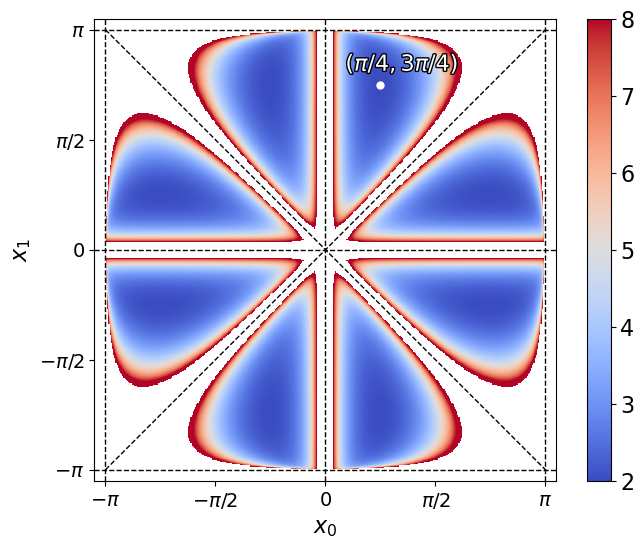

In [43]:
# Plot a 2D heatmap
plt.figure(figsize=(8, 6))
merge = 0.1
heatmap = plt.imshow(Z_masked, 
                    extent=[x.min(), x.max(), y.min(), y.max()],
                    # extent=[-np.pi-merge, np.pi+merge, -np.pi-merge, np.pi+merge],
                    # origin='lower', 
                    # aspect='auto', 
                     cmap='coolwarm',
                    # interpolation='lanczos',
                     )
cbar = plt.colorbar(heatmap)
cbar.ax.tick_params(labelsize=16)  # Set colorbar font size
# plt.title('Heatmap of L1norm_objective on valid points')
plt.xlabel(r'$x_0$', fontsize=16)
plt.ylabel(r'$x_1$', fontsize=16)

# Set x, y axis ticks to -π, -π/2, 0, π/2, π
ticks = [-np.pi, -np.pi/2, 0, np.pi/2, np.pi]
labels = [r'$-\pi$', r'$-\pi/2$', '0', r'$\pi/2$', r'$\pi$']
plt.xticks(ticks, labels, fontsize=14)
plt.yticks(ticks, labels, fontsize=14)

# Add auxiliary lines (dashed)
plt.axhline(y=-np.pi, color='black', linestyle='--', linewidth=1)  # y=-π
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # y=0
plt.axhline(y=np.pi, color='black', linestyle='--', linewidth=1)  # y=π

plt.axvline(x=-np.pi, color='black', linestyle='--', linewidth=1)  # x=-π
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # x=0
plt.axvline(x=np.pi, color='black', linestyle='--', linewidth=1)  # x=π

# Add diagonal lines y = x and y = -x (dashed)
x_diag = np.linspace(-np.pi, np.pi, 100)
plt.plot(x_diag, x_diag, 'k--', linewidth=1)  # y = x
plt.plot(x_diag, -x_diag, 'k--', linewidth=1)  # y = -x

# Plot equidistant PSR, optimal solution
# ** Add point ($\pi/4$, $3\pi/4$) **
point_x = np.pi / 4
point_y = 3 * np.pi / 4
plt.scatter(point_x, point_y, color='white', s=25, label=r'$(\pi/4, 3\pi/4)$')  # Mark point
plt.text(
    point_x - 0.5, point_y + 0.2, 
    r'$(\pi/4, 3\pi/4)$', 
    fontsize=16, color='white',
    path_effects=[path_effects.withStroke(linewidth=2, foreground='black')]
)

plt.show()


## FOR d=2,4,6

In [44]:
def L1normFinalVar(x, Omegas, d):
    b=EPSR(x, Omegas, d)
    return np.sum(np.abs(b))

r = 2

# even order d
d = 2
# d = 4
# d = 6

Omegas = np.arange(1, r+1)

L1norm_objective = lambda x:  L1normFinalVar(x, Omegas, d)

In [45]:
# Build grid data
N = 500  # Resolution
merge = 0.05 * np.pi
x = np.linspace(0 - merge, 2 * np.pi + merge, N)  # Now the range is [0, 2π]
y = np.linspace(0 - merge, 2 * np.pi + merge, N)
X, Y = np.meshgrid(x, y)

# Vectorized calculation of function values
vec_func = np.vectorize(lambda a, b: L1norm_objective(np.array([0, a, b])))
Z_data = vec_func(X, Y)


c:\Users\laizh\Desktop\code\lai_PSR_RCBCD\epsr.py:30: LinAlgWarning: Ill-conditioned matrix (rcond=7.40149e-17): result may not be accurate.
  return scipy.linalg.solve(A, b, assume_a="gen")
c:\Users\laizh\Desktop\code\lai_PSR_RCBCD\epsr.py:30: LinAlgWarning: Ill-conditioned matrix (rcond=3.70074e-17): result may not be accurate.
  return scipy.linalg.solve(A, b, assume_a="gen")


In [46]:
# Define a small tolerance
tol = 1e-3

# Filter conditions:
mask_x = np.isclose(X, 0, atol=tol) | np.isclose(X, 2 * np.pi, atol=tol)
mask_y = np.isclose(Y, 0, atol=tol) | np.isclose(Y, 2 * np.pi, atol=tol)

mask_diag1 = np.isclose(X, Y, atol=tol)  # x = y
mask_diag2 = np.isclose(X, -Y, atol=tol)  # x = -y

# Combine all the points that need to be masked
mask_valid = mask_x | mask_y | mask_diag1 | mask_diag2 

Z = Z_data.copy()
Z[mask_valid] = np.nan  # Set to NaN

# Only retain points where the function value is less than 40
# d = 2
# Z[(Z >= 30) & (Z <= 40)] = 20
# Z[Z >= 40] = np.nan

# d = 4
# Z[(Z >= 100) & (Z <= 120)] = 100
# Z[Z >= 120] = np.nan

# d = 6
Z[(Z >= 220) & (Z <= 240)] = 200
Z[Z >= 240] = np.nan

# Convert to a masked array
Z_masked = np.ma.array(Z, mask=np.isnan(Z))


Note that for different values of **d**, the code above needs to adjust **Z** accordingly, otherwise the display will not be good.

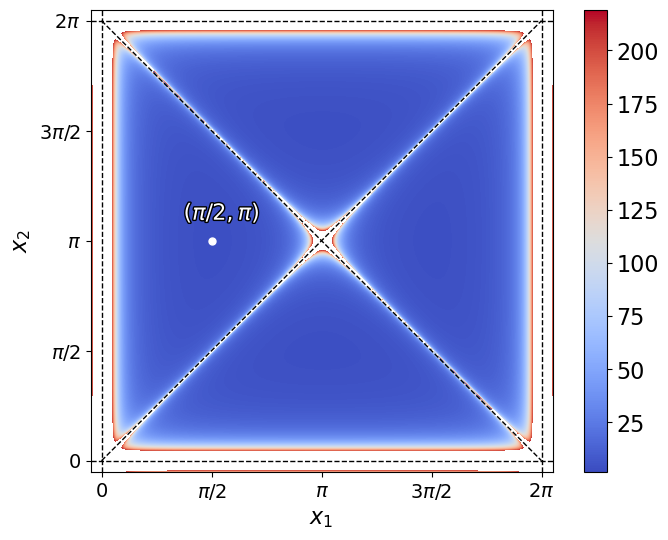

In [47]:
# Plot a 2D heatmap
plt.figure(figsize=(8, 6))
heatmap = plt.imshow(Z_masked, 
                    # extent=[0, 2*np.pi, 0, 2*np.pi],  # 🔹 Key adjustment of range
                     extent=[x.min(), x.max(), y.min(), y.max()],
                     origin='lower', cmap='coolwarm')

cbar = plt.colorbar(heatmap)
cbar.ax.tick_params(labelsize=16)  # Set the colorbar font size
# plt.title('Heatmap of L1norm_objective on valid points')
plt.xlabel(r'$x_1$', fontsize=16)
plt.ylabel(r'$x_2$', fontsize=16)

# **🔵 Adjust x, y axis ticks**
ticks = [0, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi]
labels = ['0', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$']
plt.xticks(ticks, labels, fontsize=14)
plt.yticks(ticks, labels, fontsize=14)

# **🔵 Add point ($\pi/2$, $\pi$)**
point_x = np.pi / 2
point_y = np.pi
plt.scatter(point_x, point_y, color='white', s=25, label=r'$(\pi/2, \pi)$')  # Mark the point
# plt.text(point_x, point_y + 0.15, r'$(\pi/2, \pi)$', fontsize=10, color='white', ha='center')  # Text label
plt.text(
    point_x - 0.4, point_y + 0.3, 
    r'$(\pi/2, \pi)$', 
    fontsize=16, color='white',
    path_effects=[path_effects.withStroke(linewidth=2, foreground='black')]
)

# plt.legend()

# # Add auxiliary lines (dashed)
plt.axhline(y=2*np.pi, color='black', linestyle='--', linewidth=1)  # y=2π
plt.axhline(y=0, color='black', linestyle='--', linewidth=1)  # y=0
# plt.axhline(y=np.pi, color='black', linestyle='--', linewidth=1)  # y=π

# plt.axvline(x=-np.pi, color='black', linestyle='--', linewidth=1)  # x=-π
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)  # x=0
plt.axvline(x=2*np.pi, color='black', linestyle='--', linewidth=1)  # x=2π

# # Add diagonal lines y = x and y = -x (dashed)
x_diag = np.linspace(0, 2*np.pi, 100)
plt.plot(x_diag, x_diag, 'k--', linewidth=1)  # y = x
plt.plot(x_diag, -x_diag + 2*np.pi, 'k--', linewidth=1)  # y = -x

plt.show()
